## 0.1 Importing PyTorch 导入 PyTorch
导入 PyTorch 并且检查我们所使用的版本，原版教程中使用的版本是 `1.13.1` 和 `cuda116` ，所以可能会跟出现些许不一致。

In [1]:
import torch
torch.__version__

'2.0.1'

## 0.2 Introduction to tensors 介绍 Tensors
Tensors 是组成 Block 的基本成分，他们的作用是通过数字的形式来代表各种各样的数据（例如图片，声音等等）。

例如我们可以用shape为 `[3.224,224]` 的 tensor 来表示图像，分别代表 `[colour_channels,height,width]` ，因为图像有 3 个颜色通道（红色、绿色、蓝色），高度为224 像素，宽度 224 像素。

颜色通道，高度和宽度分别代表这个 tensor 的三个 dimensions。

### 0.2.1 Creating tensors 构建 Tensors
在 PyTorch 中会经常用到 Tensors，建议仔细阅读 [PyTorch 官方文档](https://pytorch.org/docs/stable/tensors.html) 中对于 `torch.Tensor` 的描述。

下面我们先创建一个 scalar，scalar 是单个的数字，也被称之为零维 (zero dimension) 的 tensor。

In [2]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

上面我们打印了 scalar，但是返回的是并不是单纯的数字 7，这代表这即便 scalar 只有单个数字，他依旧是 `torch.tensor` 的一种类型。

我们可以用 `ndim` 来检查 tensor 的 dimension.

In [3]:
scalar.ndim

0

如果想要从 tensor 中取回你的数字，可以使用 `term()` 方法将其转化回一个 Python int (仅适用于只有一个 element 的 tensor）.

In [4]:
scalar.item()

7

接着我们介绍 vector 向量，vector 只有一个 dimension，但可以包含很多数字。

例如，我们可以使用向量 `3, 2` 来描述家里的 `卧室、浴室`。或者用 `3, 2, 2` 来描述您家里的 `卧室、浴室、停车场`。

In [5]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

在 PyTorch 中，可以简单地通过开头有多少个中括号来判断 tensor 的 dimension，换句话说，你可以通过 dimension 的多少来判断有多少组 vector。

如果你想知道每组 vector 中的形状，可以使用 `shape()` .

In [7]:
vector.shape

torch.Size([2])

下面介绍 Matrix 矩阵， matrix 可以简单理解为具有两个 dimensions 的 vector。

In [8]:
# Matrix
MATRIX = torch.tensor([[7,7],
                       [8,8]])
MATRIX

tensor([[7, 7],
        [8, 8]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

下面我们来创建 TENSOR 试试。

In [11]:
# Tensor
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,6]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 6]]])

In [12]:
 TENSOR.ndim

3

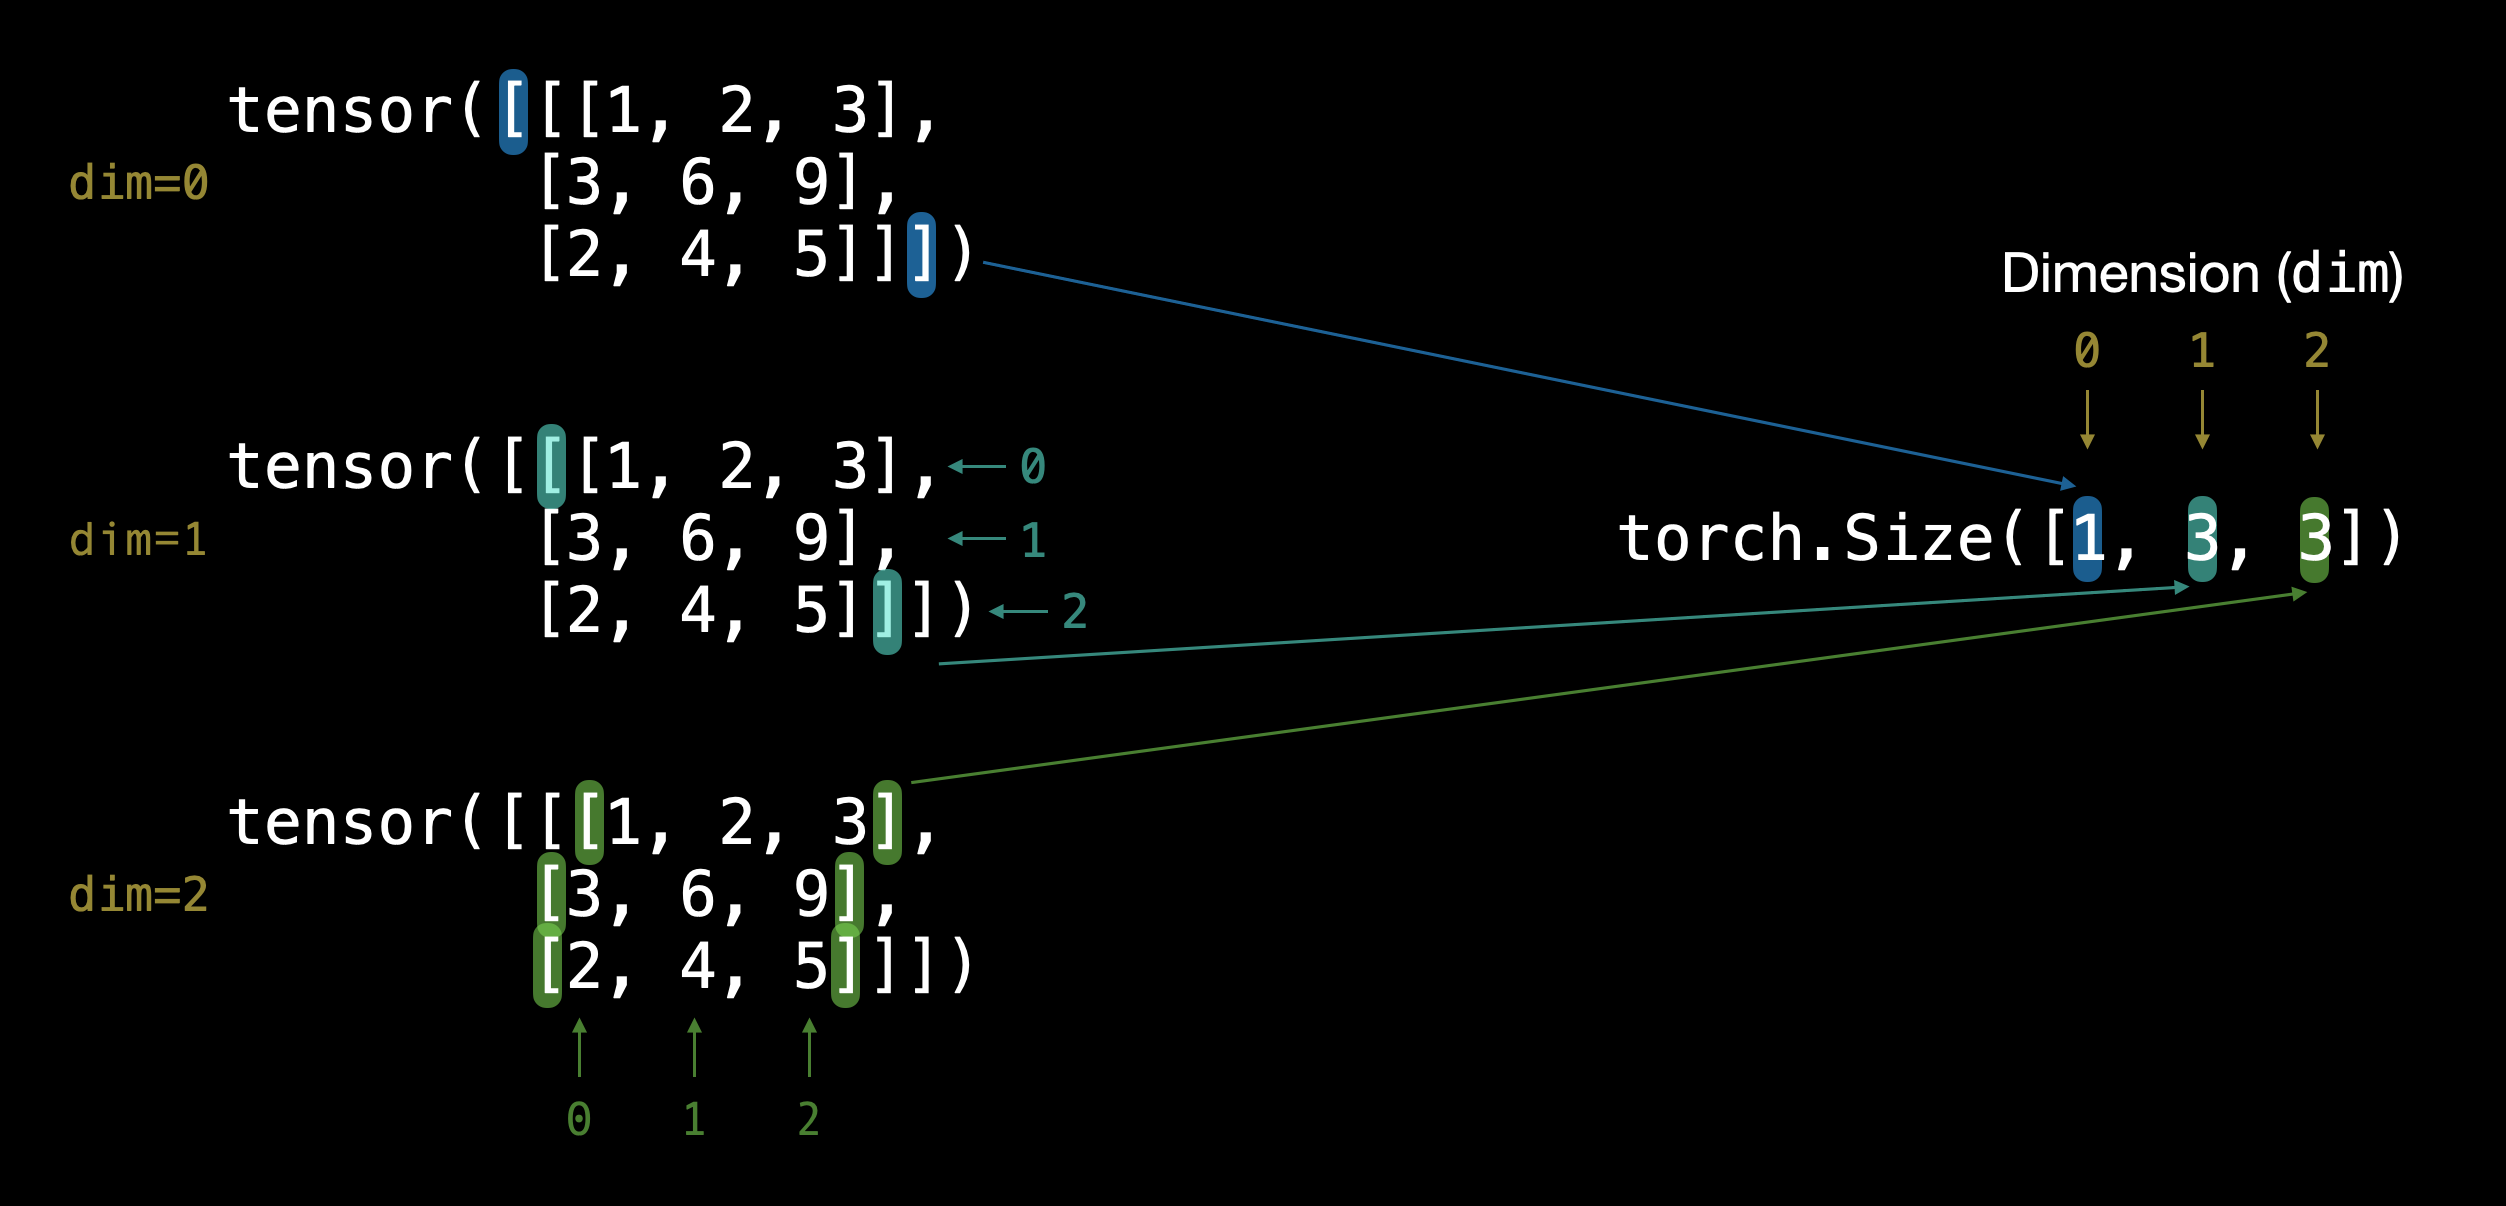

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

综上所述，Scalar、Vector、Matrix 和 Tensor 的区别可总结如下：

| **Name** | **What is it?** | **Number of dimensions** | **Lower or upper (usually/example)** |
| :---: | :---: | :---: | :---: |
| **scalar** | 一个数字 | 0 | Lower (`a`) |
| **vector** | 具有方向的数字（例如具有方向的风速），但也可以有许多其他数字 | 1 | Lower (`y`) |
| **matrix** | 二维数字数组 | 2 | Upper ( `Q` ) |
| **tensor** | n 维数字数组 | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

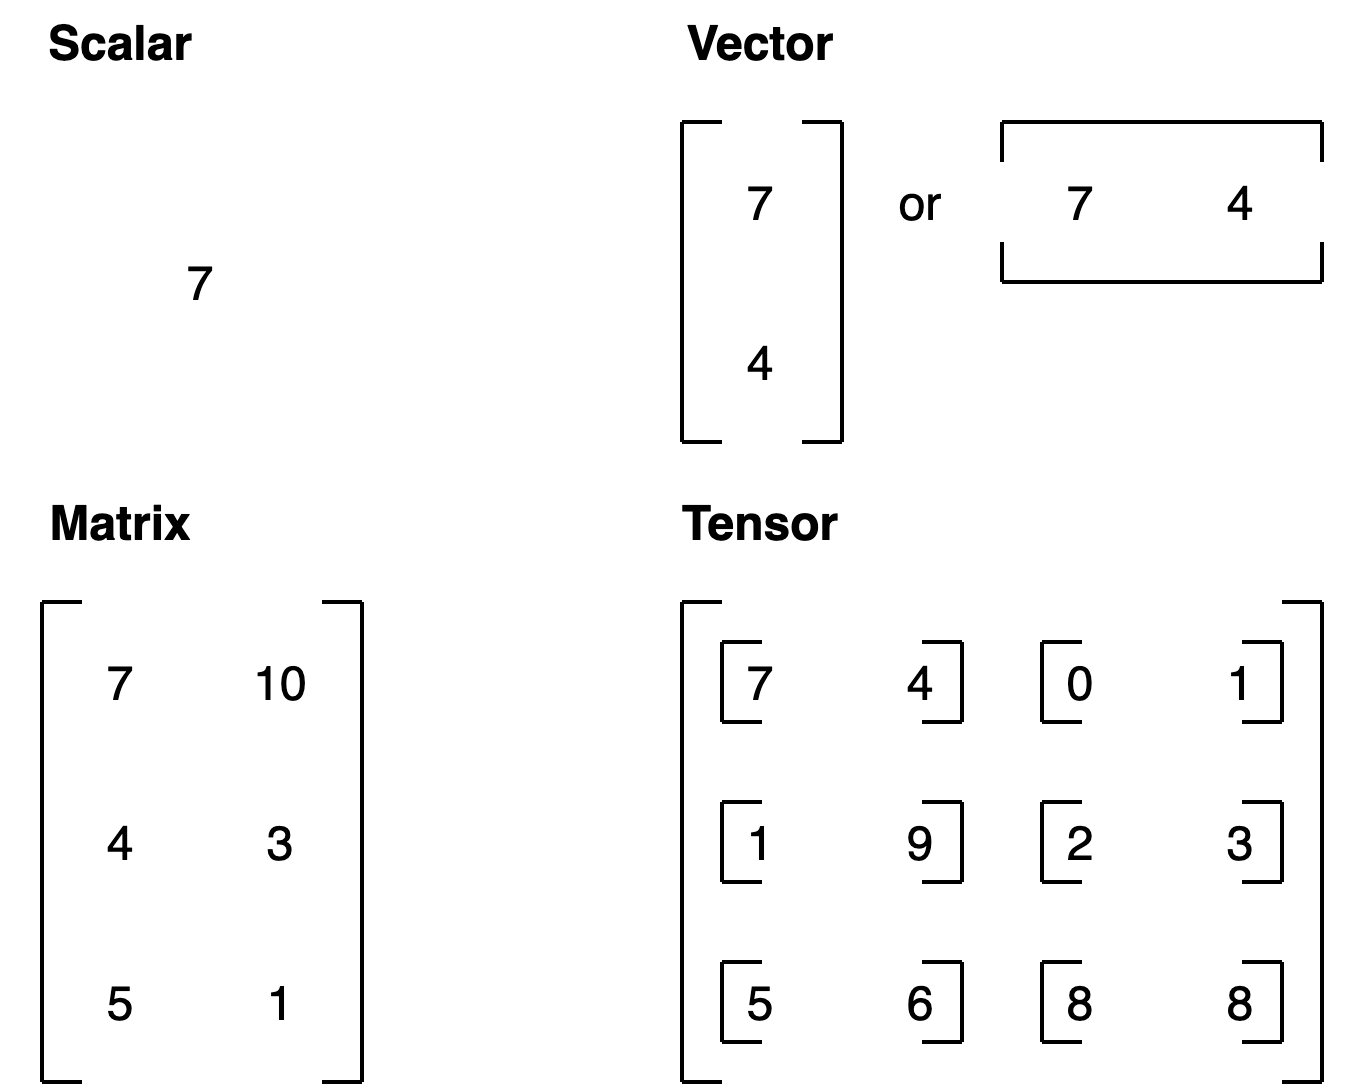

### 0.2.2 Random tensors 随机 Tensors
在上面我们已经构建了一些 tensors 来代表一些类型的数据。

在例如神经网络等机器学习模型中，模型会通过计算 tensors 来寻找 patterns。

但是当我们实际用 PyTorch 来构建机器学习模型时，我们很少会像上面那样手动的构建 tensors。恰恰相反，机器学习模型经常是使用很大一部分的随机 tensors 来开始，然后通过调整使得这些随机数组能够更好的代表数据。

当我们构建模型时，作为一名数据科学家，你可以定义机器学习模型如何启动（初始化）、查看数据（表示）和更新（优化）其随机数。
我们可以通过 `torch.rand()` 的 `size` 参数来创建随机数 tensor。

In [14]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.2126, 0.9720, 0.0552, 0.5467],
         [0.3590, 0.0675, 0.9807, 0.8961],
         [0.2634, 0.2201, 0.7931, 0.0873]]),
 torch.float32)

`torch.rand()` 的灵活性在于我们可以自定义所构建的 tensor 的格式和大小，例如我们上文提到的通过 tensor 来代表图像，其组成有有 3 个颜色通道（红色、绿色、蓝色），高度为224 像素，宽度 224 像素，那么其 shape 即为 `[3,224,224]`.

In [15]:
random_image_size_tensor = torch.rand(size=(3, 224, 224))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

### 0.2.3 Zero and ones 构建仅为 0 或 1 的 Tensor

有时候我们只想用 0 或 1 来填充整个 tensor，大部分这种情况我们称之为 masking 遮掩（即我想要遮蔽这一部分内容，让模型晓得不要去学习他们）。

这个使用我们可以使用 `torch.zeros()` 或 `torch.ones()` 来构建 tensors，调节参数依旧是 `size`.

In [16]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
print(zeros, zeros.dtype)

# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
print(ones, ones.dtype)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) torch.float32
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) torch.float32


### 0.2.4 Creating a range and tensors like 创建具有特定排序的 Tensor
有时候我们想要自己排列数字，例如从1到10或者0到100，我们可以使用 `torch.arrange(start, end, step)` 来做，其中：

- `start` 是排列的开始数字
- `end` 是排列的终止数字
- `step` 是你中间数字要相隔的距离

In [17]:
# Use torch.arange(), torch.range() is deprecated 
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1) # 不包括 10
zero_to_ten

/var/folders/d3/2mgp84dj1ql_3c9d5_5hr3dw0000gn/T/ipykernel_91685/3663452225.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

有时你可能需要某种类型的一个 tensor 与另一个 tensor 具有相同的 shape。

例如一个全是 0 的 tensor，我们需要他的 shape 跟我们另外一个 tensor 相同。这个时候可以使用 `use torch.zeros_like(input)` 或者 `torch.ones_like(input)` 来返回一个跟我们构建的 tensor 的 shape 一样的只有 0 或者 1 的 tensor（来用于marking）。

In [18]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 0.2.5 Tensor datatypes 数据类型
在PyTorch中，有很多种 [tensor datatype可供使用](https://pytorch.org/docs/stable/tensors.html#data-types)，有一些是用来给特定 CPU 的，有一些则更适合给 GPU 使用。

基本上，如果你有看到 `torch.cuda`，那么这个 tensor 基本可以确定是用于 GPU 用的（由于 Nvidia GPU 使用名为 CUDA 的计算工具包）。

最常见的 tensor type 是 `torch.float32` 或者 `torch.float`，这称为“32 位浮点 float”。

当然也有 16 位浮点（`torch.float16` 或 `torch.half`）和 64 位浮点（`torch.float64` 或 `torch.double`）。

更令人困惑的是，还有 8 位、16 位、32 位和 64 位整数 integers。

> 即 7 是 integer，但是 7.0 是 float。

之所以有这些有这些区别主要是跟 precision in computing 计算精度有关，precision 用来衡量描述数字的细节程度，更高的 bit 位（8，16，32）则表示一个数字所使用的细节和数据越多。

这在深度学习和数值计算中很重要，bit 数越高，需要计算的细节越多，需要使用的计算量就越多。因此，精度较低的数据类型通常计算速度更快，但会牺牲准确性等评估指标的一些性能（计算速度更快，但准确性较低）。

下面让我们用 `dtype` 来创建一些特定 datatype 的 tensor。

In [19]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype = None, # 默认是None，即浮点32位
                               device = None, # 使用默认的 tensor type，给 CPU 计算使用
                               requires_grad = False) # 如果为 Ture，则对于 tensor 的操作会被记录下来

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

在 PyTorch 中最常出现的问题是 tensor shape 不一致，另外两个常见的问题就是 datetype 问题和 device 问题。

例如有一个 tensor 是 `torch.float32`，另一个是 `torch.float16`。

又或是一个 tensor 是用于 CPU 计算而另一个 tensor 是用于 GPU 计算。

下面尝试创建一个浮点 16 位的 tensor。

In [20]:
float_16_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype = torch.float16) # 也可以使用 `torch.half

float_16_tensor.dtype

torch.float16

## 0.3 Getting information from tensor 从 Tensors 中获取信息

一旦你或者别人创建了 tensors，你肯定会想要从这些 tensors 中获得信息。

从上面我们已经知道了 tensor 最常见的三个属性：

- `shape` - tensor 是什么形状？ （有些操作需要特定的形状规则）
- `dtype` - tensor 中的元素/数字存储在什么数据类型中？
- `device` - tensor 存储在什么设备上？ （通常是GPU或CPU）

现在让我们创建一些 random tensor 并且从中获得一些信息。

In [21]:
# Creat a tensor
some_tensor = torch.rand(3, 4) # 我一般习惯用前面是列，后面是行来记住
some_tensor

tensor([[0.4971, 0.0256, 0.0523, 0.1258],
        [0.4602, 0.7806, 0.1948, 0.5382],
        [0.2544, 0.8648, 0.8186, 0.5269]])

In [22]:
# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.4971, 0.0256, 0.0523, 0.1258],
        [0.4602, 0.7806, 0.1948, 0.5382],
        [0.2544, 0.8648, 0.8186, 0.5269]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> 如果在 PyTorch 中遇到问题，大概率都与上述三个属性之一有关。

## 0.4 Manipulating tensors (tensor operations) 操作 Tensor
我们已经知道了在深度学习中，数据是由 tensors 来表示的。

一个模型学习就是通过探索这些 tensors 并进行一系列操作，从而创建输入数据中模式的表示。

这些操作通常由下面这行为组成：

- Addition 添加
- Substraction 减少
- Multiplication (element-wise) 元素相乘
- Division 分配
- Matrix multiplication 矩阵相乘

当然还有一些其他的东西，但这些是神经网络的基本构建块。通过堆叠这些模块，我们就可以构建神经网络模型。

### 0.4.1 Basic operations 基本操作运行
我们首先尝试加(`+`)减(`-`)乘(`*`)这三个基本操作，你会发现他们非常符合直觉地运行，

In [23]:
# Creat a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [24]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

请注意上面的张量值最终没有成为tensor `[110, 120, 130]`，这是因为 tensor 内的值不会改变，除非重新分配。下面是一个重新分配的示例。

In [25]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

PyTorch 也有一系列自带的功能例如 `torch.mul()` 和 `torch.add()` 来进行一些基本操作。

In [26]:
torch.multiply(tensor, 10)

tensor([-90, -80, -70])

In [27]:
torch.add(tensor, 10)

tensor([1, 2, 3])

在实际使用中，我们可以直接使用符号 `*` `+` `-` 来运行基本操作。

In [28]:
tensor-tensor

tensor([0, 0, 0])

In [29]:
tensor*tensor

tensor([81, 64, 49])

### 0.4.2 Matrix multiplication (is all you need) 矩阵乘法
机器学习和深度学习算法中另一个很常见的操作是[矩阵乘法 matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

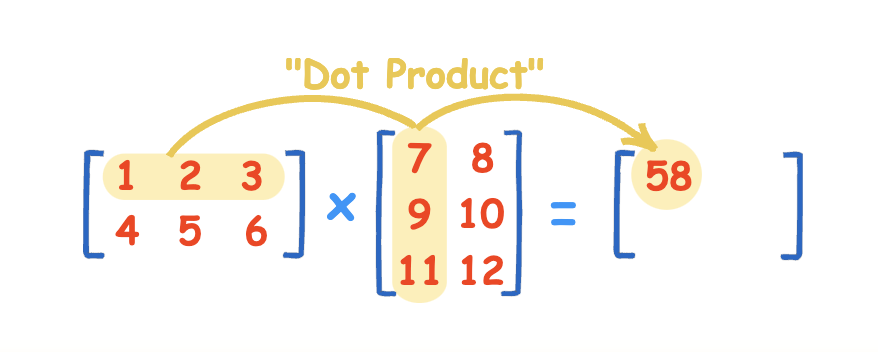
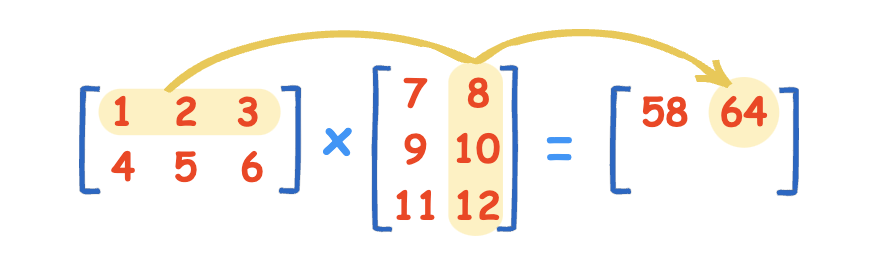
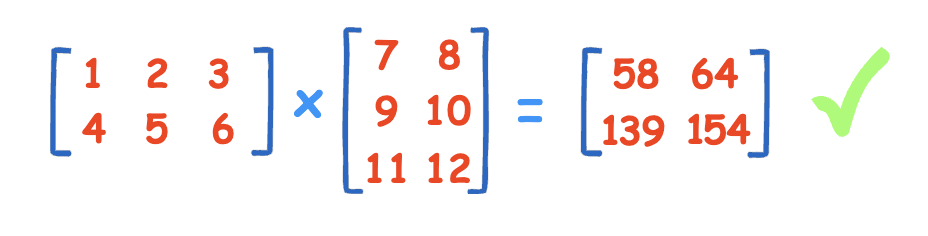

在 PyTorch 中可以使用 `torch.matmul()` 来实现矩阵相乘，也可以使用符号 `@`.

矩阵乘法有两个主要的规则需要记住：
- 生成的矩阵具有 outer dimensions 的 shape

- 内部矩阵的 dimension 必须要相匹配
    - `(3, 2) @ (3, 2)` won't work
    - `(2, 3) @ (3, 2)` will work
    - `(3, 2) @ (2, 3)` will work
    - `(2, 3) @ (3, 2)` -> (2, 2)
    - `(3, 2) @ (2, 3)` -> (3, 3)
    
下面让我们尝试进行一些元素相乘和矩阵相乘来更好地理解。

In [30]:
tensor = torch.tensor([1,2,3])
tensor.shape

torch.Size([3])

In [31]:
# Element-wise matrix multiplication
print(tensor*tensor)

# Matrix multiplication
print(tensor@tensor)

tensor([1, 4, 9])
tensor(14)


上面的运算可以总结为：

|Operation|Calculation|Code|
|------------|------------|------------|
|Element-wise multiplication|`[1*1, 2*2, 3*3] = [1, 4, 9]`|`tensor*tensor`|
|Matrix multiplication|`[1*1 + 2*2 + 3*3] = [14]`|`tensor.matmul(tensor)`|

In [32]:
print(tensor.matmul(tensor))
print(torch.matmul(tensor,tensor))
print(tensor@tensor)
# 以上三种写法都可以

tensor(14)
tensor(14)
tensor(14)


### 0.5 One of the most common errors in deep learning (shape errors) 错误之 Tensor 形状不匹配
因为很多深度学习需要进行很多矩阵操作，但是矩阵如果想要合并，对于其 shape 和 size 又有很严格的要求。所以我们在跑深度学习时最常见的一个错误就是 shape 的不匹配，下面是一个例子。

In [33]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

可以看到 tansorA 和 tensorB 都是 3x2 的矩阵，无法进行矩阵相乘。在 PyTorch 中，我们能把内部 dimension 改为相匹配的状态。

下面两种方法都可以用：
- `torch.transpose(input,dim0,dim1)`，其中 `input` 是我们想调整的 tensor，而 `dim0` 和 `dim1` 是被转换的 dimensions。
- `tensor.T`，其中 `tensor` 是想要调整的 tensor。

In [34]:
print(tensor_A)
print(tensor_B)
# Way1
print(torch.transpose(tensor_B,0,1))
# Way2
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [35]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

> 注意：像这样的矩阵乘法也称为两个矩阵的点积。

在神经网络中有很多这种矩阵乘法和点积。

`torch.nn.Linear()` 模块也被称之为也称为 feed-forward layer 前馈层或 fully connect layer全连接层，实现输入 x 和权重矩阵 A 之间的矩阵乘法。

$$y=x \cdot A^T+b$$

其中：
- `x` 是 layer 的输入（深度学习就是层和层直接的堆叠，包括 `torch.nn.Linear()` 等其他层。
- `A` 是该 layer 创建的权重矩阵，它以随机数开始，随着神经网络学习更好地表示数据中的模式而进行调整（`T` 表示矩阵被转置）。
- `b` 是误差项。
- `y` 是是输出（对输入进行操作，希望发现其中的模式）。

这很像是初中学的线性方程，我们可以试试改变 `in_feature` 和 `out_feature` 看看会发生什么。

In [36]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


这段代码主要是使用PyTorch来展示如何创建和使用一个线性层，接下来我会逐步解释每一部分：

1. `torch.manual_seed(42)`: 为了使结果可重复，我们设置了一个随机种子。这意味着无论何时你运行这段代码，如果使用相同的随机种子，你都会得到相同的随机数生成结果。这对于研究和测试特别有用，因为你可以复现你的实验。

2. `linear = torch.nn.Linear(...)`: 这是创建一个线性层的步骤。线性层就是一个简单的矩阵乘法加上一个偏置。它的参数有：
    - `in_features=2`: 这意味着你的输入矩阵或张量的每一个数据点应该有2个特征。
    - `out_features=6`: 这意味着线性层的输出为6个特征。

   为了给你直观的感觉，如果我们将线性层视为一个矩阵乘法，那么这个矩阵的形状将是(6,2)。

3. `x = tensor_A`: 这里将一个名为`tensor_A`的张量赋值给`x

4. `output = linear(x)`: 这里将输入`x`传递给我们之前定义的线性层，并获得输出。

5. 打印部分: 这段代码打印输入`x`的形状、线性层对`x`的输出以及输出的形状。

从给定的代码中，我们可以理解：给定一个形状为`(batch_size, 2)`的输入`x`（其中`batch_size`是任何整数），线性层会将其转换为形状为`(batch_size, 6)`的输出。所以 tensor_A 从一个 shape 为 `[3,2]` 的矩阵变成了 `[3,6]`。

**刚开始接触乘法矩阵时可能会感觉有点疑惑，不过随着我们学习的深入，你会发现矩阵乘法无处不在！**

### 0.5.1 Finding the min, max, mean, sum, etc (aggregation) 求极值、求和等操作
现在我们已经看到了一些操作 tensor 的方法，让我们通过一些方法来 aggregate 它们（从更多的值到更少的值）。

首先我们先来尝试创建 tensor 并找到他们的极值和均值并且求和。

In [37]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [38]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


也可以使用 `torch` 执行与上述相同的操作。

In [39]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### 0.5.2 Change tensor datatype 改变 Tensor 数据类型
刚才我们提到过，深度学习操作的一个常见问题是 tensor 具有不同的数据类型。

如果一个张量在 `torch.float64` 中，另一个张量在 `torch.float32` 中，则可能会遇到一些错误。

可以使用 `torch.Tensor.type(dtype=None)` 更改张量的数据类型，其中 `dtype` 参数是您要使用的数据类型。

首先，我们将创建一个张量并检查它的数据类型（默认为 `torch.float32`）。

In [40]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

现在我们将创建另一个与之前相同的 tensor，但将其数据类型更改为 `torch.float16`。

In [41]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

我们可以做类似的事情来制作 `torch.int8` tensor。

In [42]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

### 0.5.3 Reshaping, stacking, squeezing and unsqueezing 改变形状、堆叠以及压缩
有些时候我们只是想要更改 tensor 的 dimension，但并不想实际更改其中的值，那么我们可以使用下面这些方法：

|Method|One-line description|
|:----|:-------|
|`torch.reshape(input, shape)`|在兼容的情况下，会把`input` 改为 `shape`，也可以使用`torch.Tensor.reshape()`|
|`torch.Tensor.view(shape)`|返回原始 tensor 的不同 shape 的视图，但与原始 tensor 共享相同的数据。|
|`torch.stack(tensors, dim=0)`|沿着新 dimension 连接一系列 tensor，所有 tensor 必须具有相同的大小。|
|`torch.squeeze(input)`|通过转换 dimension value 为 1 的来压缩输入|
|`torch.unsqueeze(input, dim)`|返回输入并添加 1 到 `dim`，特定位置添加一个新的大小为1的维度。|
|`torch.permute(input, dims)`|返回输入并根据 `dim` 重新排列|

**下面是 reshape 的示例。**

In [43]:
# Reshape
tensor1 = torch.tensor([[1,1,1],
                        [2,2,2]])
print(tensor1)
print(f"shape: {tensor1.shape}")
print(f"dimension: {tensor1.ndim}")
print(f"size: {tensor1.size()}")

# reshape()
print(f"reshape():{tensor1.reshape(6,1)}")

# view()
print(f"view():{tensor1.view(3,2)}")

tensor([[1, 1, 1],
        [2, 2, 2]])
shape: torch.Size([2, 3])
dimension: 2
size: torch.Size([2, 3])
reshape():tensor([[1],
        [1],
        [1],
        [2],
        [2],
        [2]])
view():tensor([[1, 1],
        [1, 2],
        [2, 2]])


**下面是 stack 堆叠的示例。**

当我们说 "沿着第0维度" 或 "沿着第1维度" 堆叠时，我们实际上是在描述 tensor 中的索引。

对于形状为 `(3,)` 的一维张量：

- 第0维度是长度为3的那个维度。

当我们用 `torch.stack` 堆叠时：

- 如果我们沿第0维度（`dim=0`）堆叠，我们实际上是在添加一个新的维度作为第0维度，使得原来的第0维度变成第1维度。
- 如果我们沿第1维度（`dim=1`）堆叠，我们实际上是在添加一个新的维度作为第1维度，而保持原来的第0维度位置不变。

所以，尽管 `a` 和 `b` 只有一个维度，但我们仍然可以沿第1维度堆叠它们，因为我们实际上是在添加一个新的维度。

In [44]:
tensor1 = torch.tensor([[1,1,1],
                        [2,2,2]])
tensor2 = torch.tensor([[3,3,3],
                       [4,4,4]])
print(tensor2)

print(torch.stack((tensor1,tensor2),dim=0))

print(torch.stack((tensor1,tensor2),dim=1))

tensor([[3, 3, 3],
        [4, 4, 4]])
tensor([[[1, 1, 1],
         [2, 2, 2]],

        [[3, 3, 3],
         [4, 4, 4]]])
tensor([[[1, 1, 1],
         [3, 3, 3]],

        [[2, 2, 2],
         [4, 4, 4]]])


**下面是 squeeze 的示例。**

In [45]:
# 使用 torch.squeeze 输出没有维度为 1 的 tensor
tensor3 = torch.rand(2,2,2,1)
print(tensor3)
print(torch.squeeze(tensor3))

# 5
tensor4 = torch.rand(4)
print(tensor4)
print(torch.unsqueeze(tensor4, 0)) # 这将在第0维度添加一个新的维度，导致形状变为 (1, 4)。
print(torch.unsqueeze(tensor4, 1)) # 这将在第1维度添加一个新的维度，导致形状变为 (4, 1)。

tensor([[[[0.2666],
          [0.6274]],

         [[0.2696],
          [0.4414]]],


        [[[0.2969],
          [0.8317]],

         [[0.1053],
          [0.2695]]]])
tensor([[[0.2666, 0.6274],
         [0.2696, 0.4414]],

        [[0.2969, 0.8317],
         [0.1053, 0.2695]]])
tensor([0.3588, 0.1994, 0.5472, 0.0062])
tensor([[0.3588, 0.1994, 0.5472, 0.0062]])
tensor([[0.3588],
        [0.1994],
        [0.5472],
        [0.0062]])


也可以使用 `torch.permute(input, dims)` 重新排列坐标轴值的顺序，将输入转化为具有新 shape 的视图。

In [46]:
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## 0.6 Indexing (selecting data from tensors) 索引（从 Tensor 中选择数据）
有时候我们想要从 tensors 中选取一些特定的数据,例如只要第一行或者第二列之类的。这个时候可以使用 indexing，用法跟 NumPy 有点像。

In [47]:
# Create a tensor 
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
print(x, x.shape)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]) torch.Size([1, 3, 3])


In [48]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [49]:
print(f"Second square bracket: {x[0][1]}") 
print(f"Second square bracket: {x[0][1][2]}") 

Second square bracket: tensor([4, 5, 6])
Second square bracket: 6


也可以使用 `:` 指定“此维度中的所有值”，然后使用逗号 (`,`) 添加另一个维度。

In [50]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [51]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, :, 0]

tensor([[1, 4, 7]])

In [52]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [53]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

## 0.7 PyTorch tensors & NumPy
NumPy 是一个在 Python 中常用的数据处理库，PyTorch 能够跟他有很好的交互。

下面两个方法能够使得 NumPy array 和 PyTorch tensor 之间互换。

- `torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.
- `torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.

In [54]:
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> 注意：默认情况下，NumPy 数组是使用数据类型 `float64` 创建的，如果将其转换为 PyTorch tensor，它将保留相同的数据类型（如上所述）。
然而，许多 PyTorch 计算默认使用 `float32`。
因此，如果你想转换你的 NumPy 数组 (`float64`) -> PyTorch tensor (`float64`) -> PyTorch tensor (`float32`)，你可以使用 `tensor = torch.from_numpy(array).type(torch.float32)`。

因为我们上面重新分配了 tensor，所以如果更改 tensor，数组将保持不变。

In [55]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## 0.8 Reproducibility (trying to take the random out of random) 可重复性
经过上面的学习和讨论，我们已经了解到随机在深度学习所发挥的作用。简单来说，我们就是要从一堆随机数开始，通过对不同的 tensor 进行操作，使其每一次都能更好地代表我们的数据。

我们做出来的模型虽然需要依靠随机，但我们也要确保它在别人那里是可以重复的，不然就没有意义了。这个时候我们就需要 Reproducibility 可重复性，下面是一个 PyTorch 的可重复性示例来方便你理解。

In [56]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])

Tensor B:
tensor([[0.4563, 0.9719, 0.3968, 0.1496],
        [0.4743, 0.9973, 0.4436, 0.9726],
        [0.5194, 0.5337, 0.7050, 0.3362]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

在上面我们随机创建了两个 shape 为 (3,4) 的 tensor，可以看到他们是完全不相同的（当然也有可能相同但是概率很小），但如果我们想要故意使他们相同呢？这个时候可以使用 `torch.manual_seed(seed)` 来控制。现在我们再来试试。

> 玩过我的世界的话，其实这就相当于生成地图的种子数，虽然地图生成随机，但是种子数相同则可以生成一样的地图。

In [57]:
# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

## 0.9 Running tensors on GPUs (and making faster computations) 在显卡上运算 Tensors
深度学习离不开显卡，如果你的电脑有显卡，你可以使用它加快你的运算。如果没有，建议你使用学校的服务器进行计算~~或者换一台有显卡电脑~~。

由于这个Notebook是在M系列芯片的Mac上完成的，所以下面的示例主要是在Mac上其中GPU加速的代码，你可以在[英文教程](https://www.learnpytorch.io/00_pytorch_fundamentals/#reproducibility-trying-to-take-the-random-out-of-random)寻找在Google Colab、Nvidia或者云计算平台启用GPU加速的代码。

### 0.9.1 Getting PyTorch to run on the GPU 在苹果 M 系列芯片上运行 PyTorch
在苹果M系列芯片启用GPU加速，你可以使用 `torch.backends.mps`。你可以在[这里](https://developer.apple.com/metal/pytorch/)找到更多讯息。

下面先确认你是否正确安装了具有 MPS backends 支持的 Anacoda。

In [58]:
# verify mps support using a simple Python script
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


下面展示我们需要如何设置代码，使其在 CPU 或 GPU（如果可用）上运行。

这样，如果别人决定运行代码，无论他们使用什么计算设备，它都会正常工作。

In [59]:
# Set device type
if torch.cuda.is_available():  # 默认设置了cuda，因为还是 Nvida 家的用户多一些
    device = "cuda"
elif torch.backends.mps.is_available():  
    device = "mps"
else:
    device = "cpu"

print(device)

mps


### 0.9.2 Putting tensors (and models) on the GPU 把 Tensor 和模型放到显卡上运算
接着我们就要学习如何通过调用 [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) 将 tensors（或 models）放置在特定设备上。其中 `device` 是您希望 tensors（或 models ）前往的目标设备。

> 注意：使用 `to(device)` （例如 `some_tensor.to(device)`）将张量放在 GPU 上会返回该 tensors 的副本，例如 CPU 和 GPU 上将使用相同的 tensors。要覆盖 tensors，请重新分配它们：`some_tensor = some_tensor.to(device)`。

让我们尝试创建一个 tensor 并将其放在 GPU 上（如果可用）。

In [60]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='mps:0')

### 0.9.3 Moving tensors back to the CPU 将 Tensor 取回到中央处理器运算
有些时候我们会想要把 tensors 从 GPU 放回 CPU，例如想使用 NumPy 与 tensor 交互（NumPy 不利用 GPU），这个时候可以使用 `Tensor.cpu` 方法，下面用我们构建的 `tensor_on_gpu` 举一个例子。

In [61]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [62]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

上面的代码返回了 CPU 内存中 GPU tensor 的副本，因此原始 tensor 仍然在 GPU 上。

## Exercises & Extra-curriculum 练习和额外课程
- 练习：[Exercise template notebook for 00.](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb)
- 答案：[Example solutions notebook for 00 (先练再看).](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/00_pytorch_fundamentals_exercise_solutions.ipynb)
- [PyTorch 官方基础教程](https://pytorch.org/tutorials/beginner/basics/intro.html), 推荐认真看完 Quickstart 和 Tensors 部分。
